In [ ]:
!pip install imbalanced-learn scikit-learn matplotlib


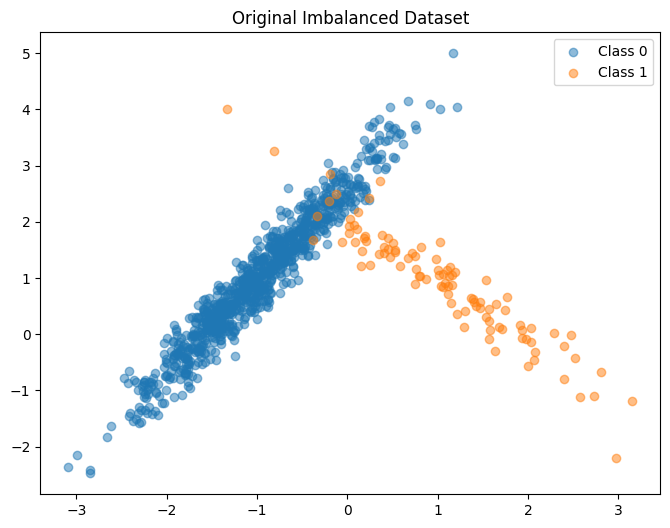

Original Dataset:
Class distribution: [900 100]


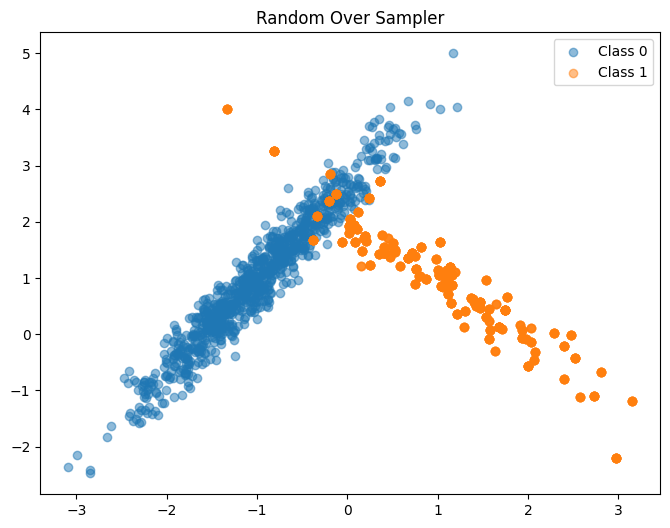


Random Over Sampler Dataset:
Class distribution: [900 900]


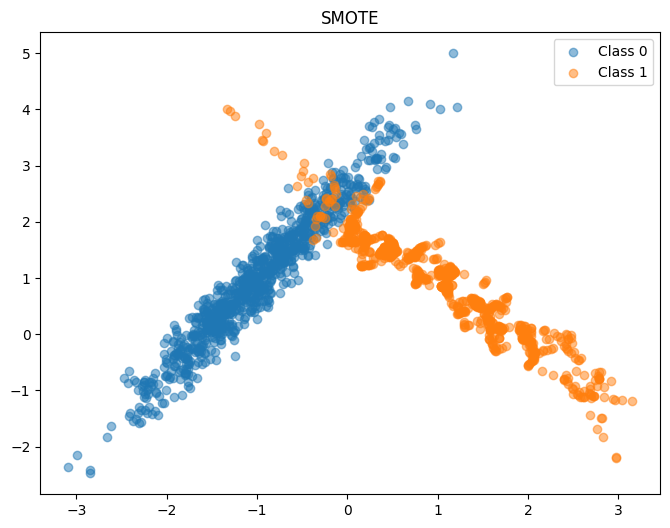


SMOTE Dataset:
Class distribution: [900 900]


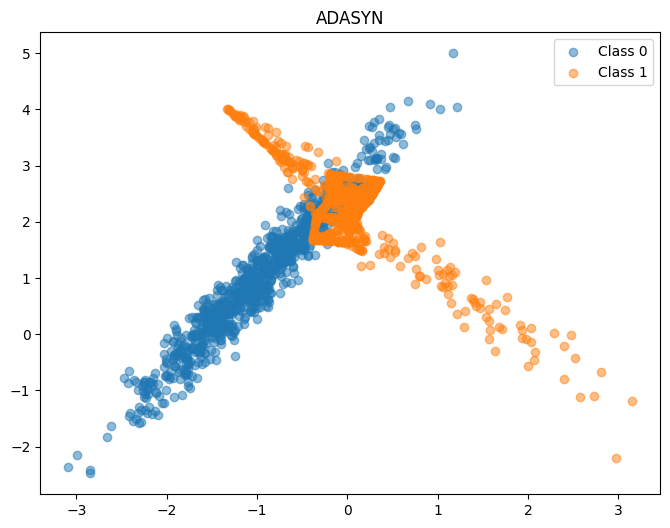


ADASYN Dataset:
Class distribution: [900 899]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC, ADASYN

# Create an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           weights=[0.9, 0.1], flip_y=0, random_state=42)

# Function to plot the dataset
def plot_data(X, y, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", alpha=0.5)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", alpha=0.5)
    plt.title(title)
    plt.legend()
    plt.show()

# Plot the original dataset
plot_data(X, y, "Original Imbalanced Dataset")
print("Original Dataset:")
print(f"Class distribution: {np.bincount(y)}")

# 1. Random Over Sampler
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)
plot_data(X_ros, y_ros, "Random Over Sampler")
print("\nRandom Over Sampler Dataset:")
print(f"Class distribution: {np.bincount(y_ros)}")

# 2. SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
plot_data(X_smote, y_smote, "SMOTE")
print("\nSMOTE Dataset:")
print(f"Class distribution: {np.bincount(y_smote)}")

# 3. SMOTENC (using categorical features if any, but in this example, we don't have any categorical features)
# Just for demonstration purposes
# X_smote_nc, y_smote_nc = SMOTENC(categorical_features=[0, 1], random_state=42).fit_resample(X, y)
# plot_data(X_smote_nc, y_smote_nc, "SMOTENC")
# print("\nSMOTENC Dataset:")
# print(f"Class distribution: {np.bincount(y_smote_nc)}")

# 4. ADASYN
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)
plot_data(X_adasyn, y_adasyn, "ADASYN")
print("\nADASYN Dataset:")
print(f"Class distribution: {np.bincount(y_adasyn)}")


#SMOTE C

Original Dataset:
Minority Class:
 [[2 3]
 [3 5]
 [4 2]]
Majority Class:
 [[7 8]
 [6 9]
 [8 7]
 [7 6]]


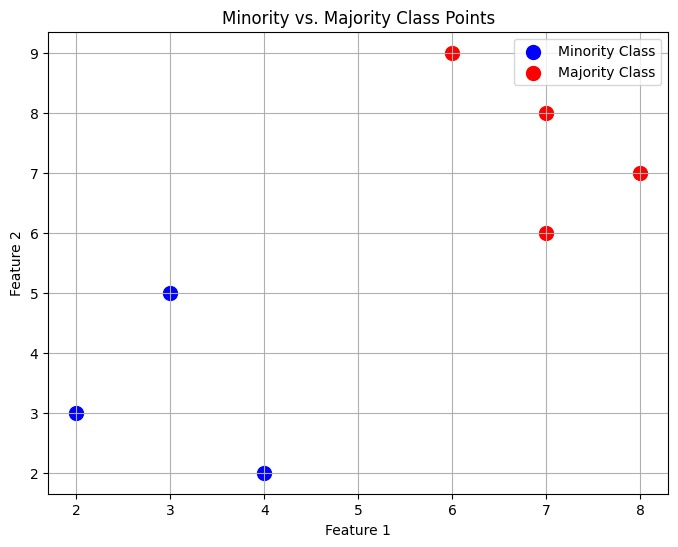


New Dataset after adding the synthetic point:
Minority Class:
 [[2.  3. ]
 [3.  5. ]
 [4.  2. ]
 [2.3 3.6]]
Majority Class:
 [[7 8]
 [6 9]
 [8 7]
 [7 6]]


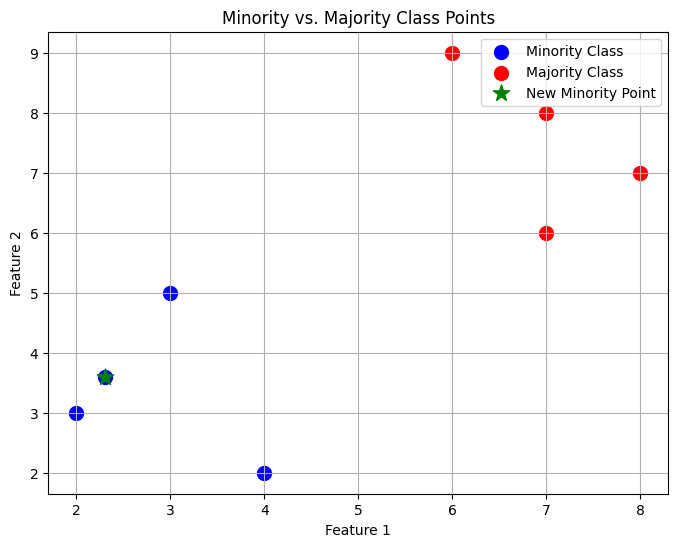

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Original dataset: Minority class (fraud) and majority class (non-fraud)
minority_class = np.array([[2, 3], [3, 5], [4, 2]])  # Minority class points
majority_class = np.array([[7, 8], [6, 9], [8, 7], [7, 6]])  # Majority class points

# Plot the original data points
def plot_data(minority, majority, new_point=None):
    plt.figure(figsize=(8, 6))

    # Plot existing points
    plt.scatter(minority[:, 0], minority[:, 1], color='blue', label='Minority Class', s=100)
    plt.scatter(majority[:, 0], majority[:, 1], color='red', label='Majority Class', s=100)

    # Plot the new point, if available
    if new_point is not None:
        plt.scatter(new_point[0], new_point[1], color='green', label='New Minority Point', s=150, marker='*')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Minority vs. Majority Class Points')
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 1: Plot the original dataset
print("Original Dataset:")
print("Minority Class:\n", minority_class)
print("Majority Class:\n", majority_class)
plot_data(minority_class, majority_class)

# Step 2: Generate a new synthetic point for the minority class
def generate_synthetic_point(A, B, lam=0.5):
    """Generates a synthetic point between two given points A and B."""
    return A + lam * (B - A)

# Select two minority class points
A = minority_class[0]  # [2, 3]
B = minority_class[1]  # [3, 5]

# Generate a new point with lambda = 0.7
new_point = generate_synthetic_point(A, B, lam=0.3)

# Step 3: Add the new point to the minority class
minority_class = np.vstack([minority_class, new_point])

# Step 4: Print the new dataset
print("\nNew Dataset after adding the synthetic point:")
print("Minority Class:\n", minority_class)
print("Majority Class:\n", majority_class)

# Step 5: Plot the new dataset with the added point
plot_data(minority_class, majority_class, new_point)


# CNN

Original Dataset:


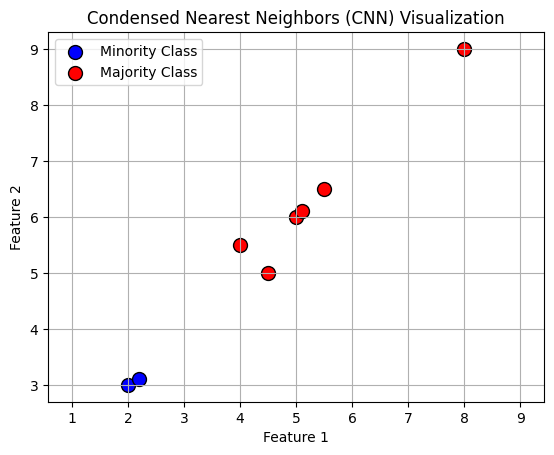

Dataset after Condensed Nearest Neighbors (CNN):


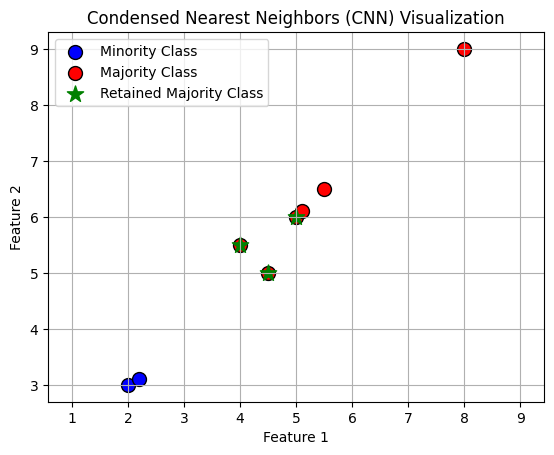

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Create an imbalanced dataset
# Minority Class (Fraud) - blue
minority_class = np.array([[2.0, 3.0], [2.2, 3.1]])

# Majority Class (Non-Fraud) - red
majority_class = np.array([[5.0, 6.0],
                            [5.5, 6.5],
                            [5.1, 6.1],
                            [8.0, 9.0],
                            [4.5, 5.0],
                            [4.0, 5.5]])

# Function to plot the dataset
def plot_data(minority, majority, retained=None):
    plt.scatter(minority[:, 0], minority[:, 1], color='blue', label='Minority Class', s=100, edgecolor='k')
    plt.scatter(majority[:, 0], majority[:, 1], color='red', label='Majority Class', s=100, edgecolor='k')

    if retained is not None:
        plt.scatter(retained[:, 0], retained[:, 1], color='green', label='Retained Majority Class', s=150, marker='*')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Condensed Nearest Neighbors (CNN) Visualization')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()

# Plot original dataset
print("Original Dataset:")
plot_data(minority_class, majority_class)

# Step 1: Find nearest neighbors for each minority instance
nbrs = NearestNeighbors(n_neighbors=3).fit(majority_class)
retained_indices = set()

for minority_point in minority_class:
    distances, indices = nbrs.kneighbors([minority_point])
    retained_indices.update(indices[0])  # Get indices of retained majority points

# Retain the majority instances
retained_majority = majority_class[list(retained_indices)]

# Plot the new dataset after applying CNN
print("Dataset after Condensed Nearest Neighbors (CNN):")
plot_data(minority_class, majority_class, retained_majority)


# Cluster Centroids

Original Dataset:


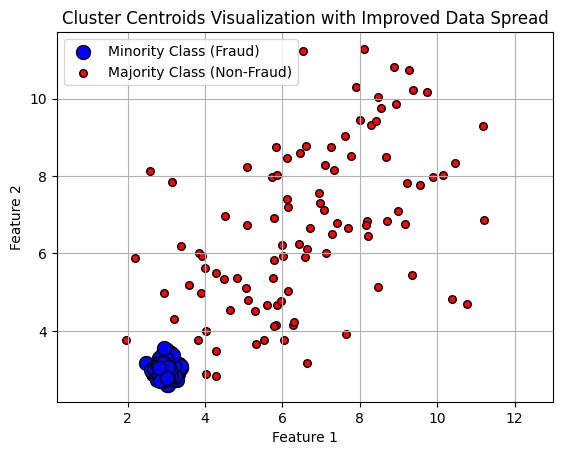

Dataset after Cluster Centroids Method:


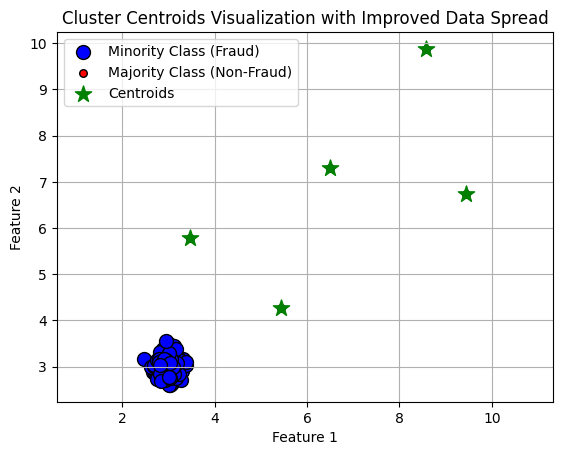

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Function to create imbalanced data with better spread
def create_data():
    np.random.seed(42)

    # Create compact circular data for minority class (Fraud)
    minority_class = np.random.normal(loc=[3, 3], scale=0.2, size=(100, 2))  # Clustered around (3, 3)

    # Create a more spread out majority class (Non-Fraud)
    majority_class_x = np.concatenate([
        np.random.normal(loc=5, scale=1.5, size=50),  # Cluster around (5, 5)
        np.random.normal(loc=8, scale=1.5, size=50)   # Additional cluster around (8, 8)
    ])
    majority_class_y = np.concatenate([
        np.random.normal(loc=5, scale=1.5, size=50),
        np.random.normal(loc=8, scale=1.5, size=50)
    ])
    majority_class = np.column_stack((majority_class_x, majority_class_y))  # Combine x and y

    return minority_class, majority_class

# Create dataset
minority_class, majority_class = create_data()

# Function to plot the dataset
def plot_data(minority, majority, centroids=None):
    plt.scatter(minority[:, 0], minority[:, 1], color='blue', label='Minority Class (Fraud)', s=100, edgecolor='k')
    plt.scatter(majority[:, 0], majority[:, 1], color='red', label='Majority Class (Non-Fraud)', s=30, edgecolor='k')

    if centroids is not None:
        plt.scatter(centroids[:, 0], centroids[:, 1], color='green', label='Centroids', s=150, marker='*')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Cluster Centroids Visualization with Improved Data Spread')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()

# Plot original dataset
print("Original Dataset:")
plot_data(minority_class, majority_class)

# Step 1: Clustering the majority class
# Number of clusters (can be adjusted)
n_clusters = 5  # Define the number of clusters for the majority class
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(majority_class)

# Step 2: Get centroids
centroids = kmeans.cluster_centers_

# Step 3: Plot the new dataset with centroids
# Combine minority class and centroids
new_majority_class = centroids
combined_dataset = np.vstack((minority_class, new_majority_class))

print("Dataset after Cluster Centroids Method:")
plot_data(minority_class, new_majority_class, centroids)


#ENN

Original Dataset:


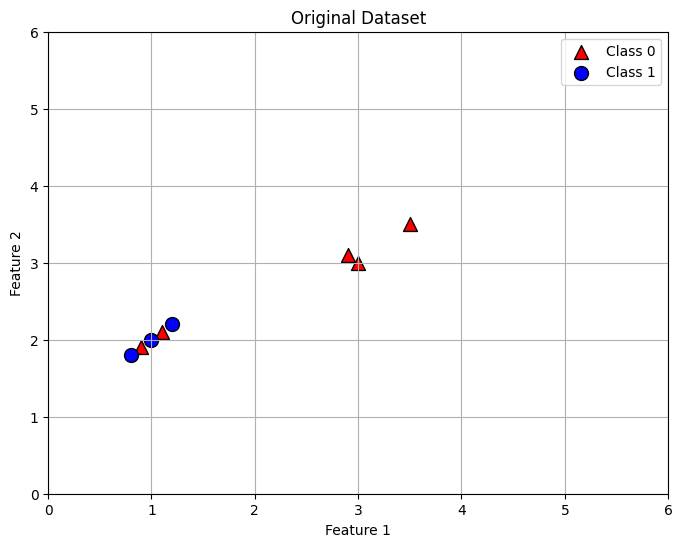

Class distribution after ENN: {0: 3, 1: 3}
Dataset after ENN:


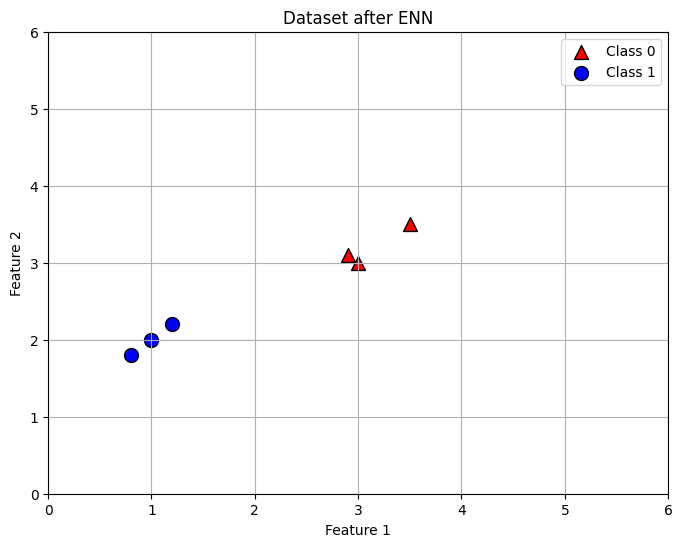

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from imblearn.under_sampling import EditedNearestNeighbours

# Create a 2D imbalanced dataset (for visualization)
# Class 1: Minority (Fraud) - Blue
minority_class = np.array([[1, 2], [1.2, 2.2], [0.8, 1.8]])

# Class 0: Majority (Legitimate) - Red
majority_class = np.array([[3, 3], [3.5, 3.5], [2.9, 3.1],  # Core cluster
                           [1.1, 2.1], [0.9, 1.9]])  # Noisy points near minority class

# Combine the dataset
X = np.vstack((minority_class, majority_class))
y = np.array([1, 1, 1, 0, 0, 0, 0, 0])  # Class labels (1 = Fraud, 0 = Legitimate)

# Function to plot the dataset with fixed axis limits
def plot_dataset(X, y, title, xlim=(0, 6), ylim=(0, 6)):
    plt.figure(figsize=(8, 6))
    for label in np.unique(y):
        marker = 'o' if label == 1 else '^'
        color = 'blue' if label == 1 else 'red'
        plt.scatter(X[y == label, 0], X[y == label, 1],
                    label=f"Class {label}", s=100, edgecolor='k', marker=marker, color=color)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.xlim(xlim)  # Set x-axis limits
    plt.ylim(ylim)  # Set y-axis limits
    plt.show()

# Plot the original dataset
print("Original Dataset:")
plot_dataset(X, y, "Original Dataset")

# Apply ENN with k=3 nearest neighbors
enn = EditedNearestNeighbours(n_neighbors=2)
X_resampled, y_resampled = enn.fit_resample(X, y)

# Print the counts of each class after resampling
unique, counts = np.unique(y_resampled, return_counts=True)
print(f"Class distribution after ENN: {dict(zip(unique, counts))}")

# Plot the dataset after applying ENN with fixed axis limits
print("Dataset after ENN:")
plot_dataset(X_resampled, y_resampled, "Dataset after ENN", xlim=(0, 6), ylim=(0, 6))


#RENN

Original Dataset:


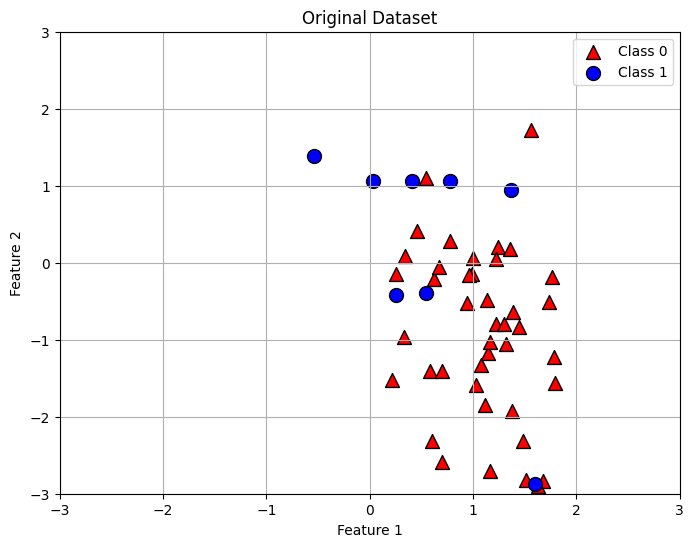

Class distribution after 1st ENN: {0: 33, 1: 8}


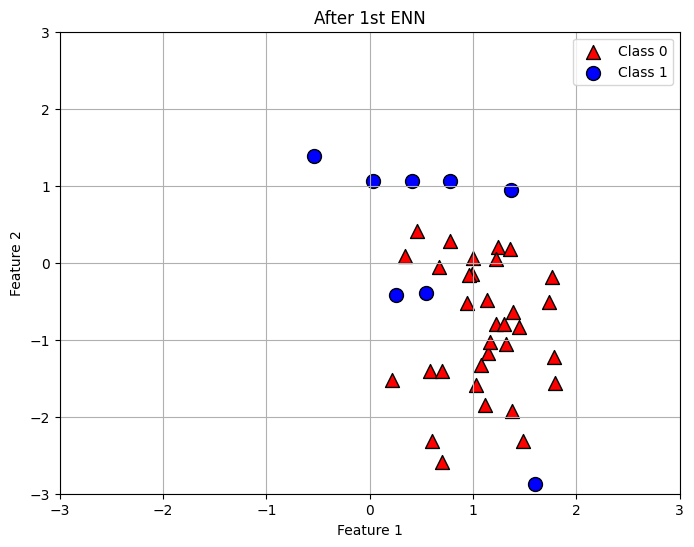

Class distribution after 2nd ENN: {0: 31, 1: 8}


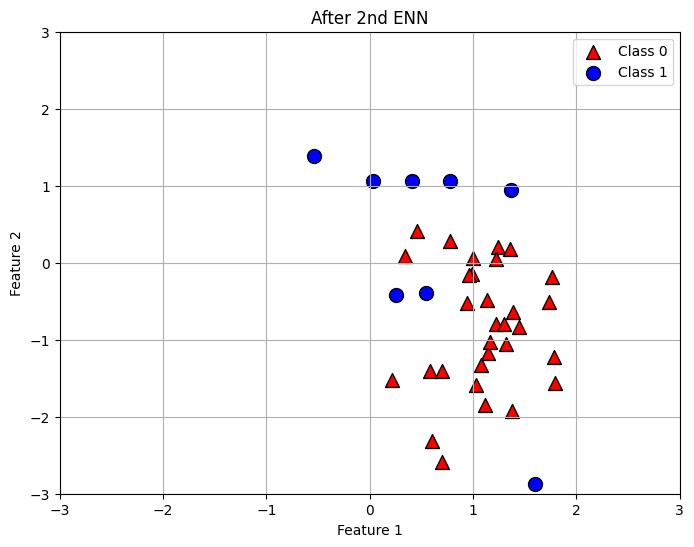

Class distribution after 3rd ENN: {0: 30, 1: 8}


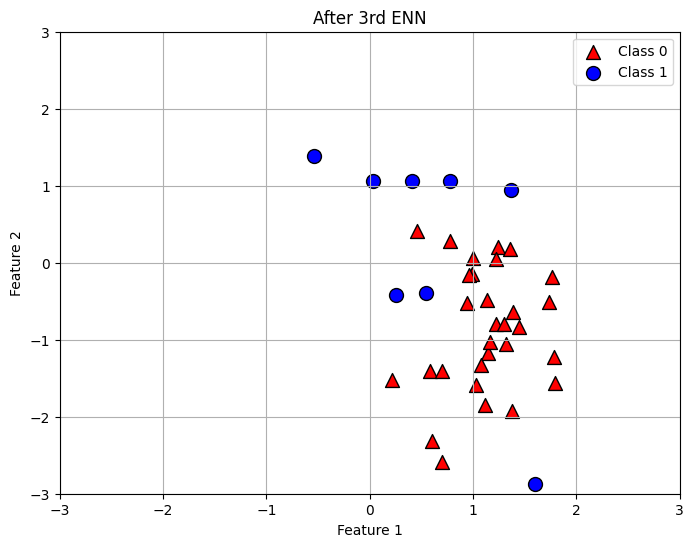

Class distribution after inbuilt RENN: {0: 29, 1: 8}


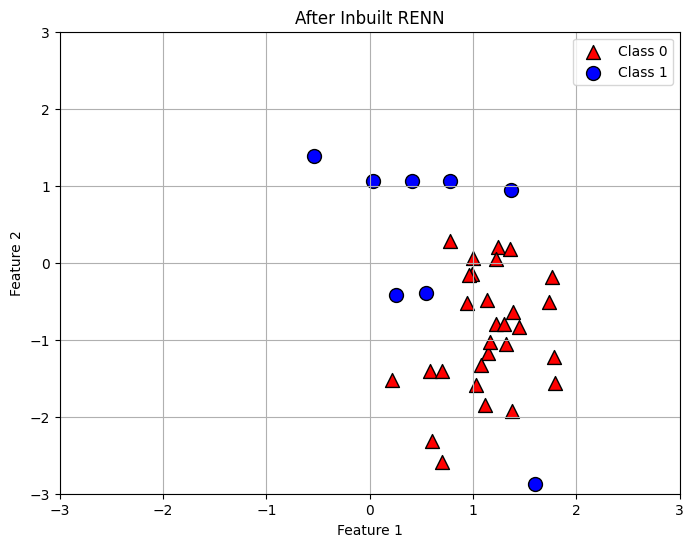

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from imblearn.under_sampling import EditedNearestNeighbours, RepeatedEditedNearestNeighbours
from sklearn.datasets import make_classification

# Generate a synthetic 2D dataset with imbalanced classes
X, y = make_classification(n_samples=50, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           weights=[0.9, 0.1], flip_y=0.05, random_state=42)

# Function to plot the dataset with consistent axis limits
def plot_dataset(X, y, title, xlim=(-3, 3), ylim=(-3, 3)):
    plt.figure(figsize=(8, 6))
    for label in np.unique(y):
        marker = 'o' if label == 1 else '^'
        color = 'blue' if label == 1 else 'red'
        plt.scatter(X[y == label, 0], X[y == label, 1],
                    label=f"Class {label}", s=100, edgecolor='k', marker=marker, color=color)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.show()

print("Original Dataset:")
plot_dataset(X, y, "Original Dataset")

# Apply ENN multiple times manually to simulate RENN
enn = EditedNearestNeighbours(n_neighbors=3)

# First ENN pass
X_resampled_1, y_resampled_1 = enn.fit_resample(X, y)
print(f"Class distribution after 1st ENN: {dict(zip(*np.unique(y_resampled_1, return_counts=True)))}")
plot_dataset(X_resampled_1, y_resampled_1, "After 1st ENN", xlim=(-3, 3), ylim=(-3, 3))

# Second ENN pass
X_resampled_2, y_resampled_2 = enn.fit_resample(X_resampled_1, y_resampled_1)
print(f"Class distribution after 2nd ENN: {dict(zip(*np.unique(y_resampled_2, return_counts=True)))}")
plot_dataset(X_resampled_2, y_resampled_2, "After 2nd ENN", xlim=(-3, 3), ylim=(-3, 3))

# Third ENN pass
X_resampled_3, y_resampled_3 = enn.fit_resample(X_resampled_2, y_resampled_2)
print(f"Class distribution after 3rd ENN: {dict(zip(*np.unique(y_resampled_3, return_counts=True)))}")
plot_dataset(X_resampled_3, y_resampled_3, "After 3rd ENN", xlim=(-3, 3), ylim=(-3, 3))

# Now apply the inbuilt RENN for comparison
renn = RepeatedEditedNearestNeighbours(n_neighbors=3)
X_renn, y_renn = renn.fit_resample(X, y)

# Print final class distribution after inbuilt RENN
print(f"Class distribution after inbuilt RENN: {dict(zip(*np.unique(y_renn, return_counts=True)))}")

# Plot the dataset after applying inbuilt RENN
plot_dataset(X_renn, y_renn, "After Inbuilt RENN", xlim=(-3, 3), ylim=(-3, 3))
